In [3]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pickle 

In [4]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [5]:
x_train = data['x_train_log']
x_test = data['x_test_log']
y_train = data['y_train_log']
y_test = data['y_test_log']

In [6]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[14:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [7]:
y_pred = xgb.predict(x_test)

In [8]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.976175718028485
MSE: 1.4469608331997312
RMSE: 1.2028968506067887


In [9]:
parameters = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 500],
    'objective': ['reg:squarederror']
}

In [10]:
xgb_random = RandomizedSearchCV(
    estimator = xgb, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [11]:
xgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.255 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.316 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.167 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.090 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7;, score=-6.219 total time=   0.6s
[CV 1/5] END colsample_bytree

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=1,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 500],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.5, 0.7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [13]:
xgb_random.best_params_

{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [14]:
prediction = xgb_random.predict(x_test)

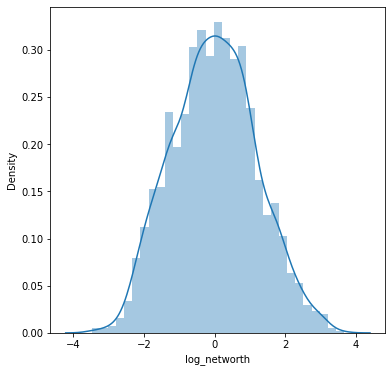

In [15]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.9650270906184917
MSE: 1.4218023621533395
RMSE: 1.1923935433208868


In [23]:
root = '../../data/ML_models/'

file = open(root + 'XGBRegressor.pkl', 'wb')
pickle.dump(xgb_random, file)
file.close()